In [2]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *


plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

#### Experiment #1 : $\theta$ accross all layers (Top-10% filters)

In [3]:
model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [4]:
k = 10 # Top 10% highest l2-magnitude filters

In [ ]:
conv_layers = []
for l in model.layers:
    if 'conv2d' in str(type(l)).lower():
        if l.kernel_size == (3,3):
            conv_layers.append(l)
e_beta = []
beta = []
min_beta = []
max_beta = []
for l_num, l in enumerate(conv_layers):
    print(f" ============ LAYER {l_num} ==================")
    top10F=topKfilters(model, l_num, k=k)
    filters = get_filter(model, l_num)[:,:,:, top10F]
    print(filters.shape)
    
    s, a = getSymAntiSymTF(filters)
    theta = getSobelTF(filters)
    a_energy = reduce_euclidean_norm(a, axis=[0,1])**2
    s_energy = reduce_euclidean_norm(s, axis=[0,1])**2
    total_energy  = reduce_euclidean_norm(filters, axis=[0,1])**2
    #beta = a_energy/total_energy
    beta.append(tf.reduce_mean(a_energy/total_energy, (0)))

    e_beta.append(np.mean(tf.reduce_mean(a_energy/total_energy, (0))))
    '''min_beta.append(e_beta[-1] - np.min(beta))
    max_beta.append(np.max(beta)-e_beta[-1])'''




 ============ LAYER 0 ==================
(3, 3, 3, 6)
 ============ LAYER 1 ==================
(3, 3, 64, 6)
 ============ LAYER 2 ==================
(3, 3, 64, 12)
 ============ LAYER 3 ==================
(3, 3, 128, 12)
 ============ LAYER 4 ==================
(3, 3, 128, 25)
 ============ LAYER 5 ==================
(3, 3, 256, 25)
 ============ LAYER 6 ==================
(3, 3, 256, 25)
 ============ LAYER 7 ==================
(3, 3, 256, 51)
 ============ LAYER 8 ==================
(3, 3, 512, 51)
 ============ LAYER 9 ==================
(3, 3, 512, 51)
 ============ LAYER 10 ==================
(3, 3, 512, 51)
 ============ LAYER 11 ==================
(3, 3, 512, 51)
 ============ LAYER 12 ==================
(3, 3, 512, 51)


In [ ]:
e_beta

[0.8913734,
 0.57749516,
 0.6857469,
 0.57314867,
 0.47667313,
 0.5382141,
 0.5858654,
 0.5233497,
 0.58639646,
 0.5390839,
 0.52602124,
 0.46240327,
 0.37830177]

In [ ]:
e_beta

[0.8913734,
 0.57749516,
 0.6857469,
 0.57314867,
 0.47667313,
 0.5382141,
 0.5858654,
 0.5233497,
 0.58639646,
 0.5390839,
 0.52602124,
 0.46240327,
 0.37830177]

In [ ]:
np.beta

[0.22781104,
 0.41521698,
 0.14552331,
 0.27890494,
 0.30987573,
 0.26655197,
 0.21458942,
 0.27062583,
 0.19698358,
 0.16243881,
 0.14589325,
 0.11310837,
 0.056578934]

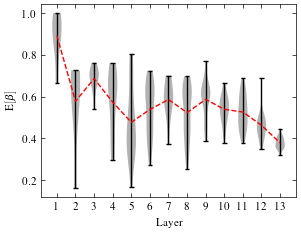

In [ ]:
plt.violinplot(beta)
plt.plot(np.arange(1, len(conv_layers)+1), e_beta)
#plt.errorbar(np.arange(0, len(conv_layers)), e_beta, yerr = [min_beta, max_beta], fmt ='o')

plt.xlabel("Layer")
plt.ylabel(r"$\text{E}[\beta]$")
plt.xticks(np.arange(1, len(conv_layers)+1, step=1))
plt.minorticks_off()
plt.savefig('figures/vgg16_ebeta.png', dpi=600)

plt.show()
plt.close()